In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib.dates as dates
import pymannkendall as mk


## analysis of trend and state


ndvi 2000-2009 sorted
2005-12-31    0.360601
2009-12-31    0.436095
2002-12-31    0.476285
2006-12-31    0.481510
2003-12-31    0.483944
2004-12-31    0.523675
2008-12-31    0.523910
2001-12-31    0.592255
2007-12-31    0.607311
2000-12-31    0.656425
Name: ndvi, dtype: float64
2010-2012 mean ndvi, rank:  0.3488698493337388 0.0
2018-2020 mean ndvi, rank:  0.4087218781821924 10.0
difference rank:  10.0
trend 2000-2014 no trend
trend 2013 2020 decreasing


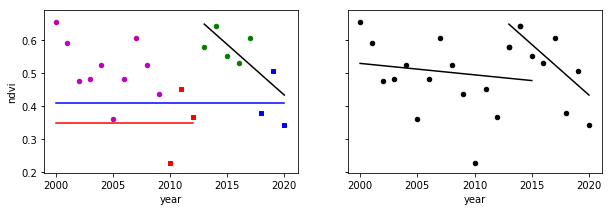

In [123]:
origin = 0 
slope = 0
rand_mu = 0.5
rand_sigma=0.1

df = pd.DataFrame()
df['year']= np.arange(2000, 2021)
df.index= pd.date_range(start='2000', end='2021', freq='1Y')
df['ndvi'] = origin + slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  
df.loc['2000':'2012']

print('ndvi 2000-2009 sorted')
print(df.loc['2000':'2009', 'ndvi'].sort_values())

mean_10_12 = df.loc['2010':'2012', 'ndvi'].mean()
rank_10_12 = stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_10_12)
mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
rank_18_20 = stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_18_20)
print('2010-2012 mean ndvi, rank: ', mean_10_12, rank_10_12)
print('2018-2020 mean ndvi, rank: ', mean_18_20, rank_18_20)
print('difference rank: ', rank_18_20 - rank_10_12)

trend_2000_2014, h, p, z, Tau, s, var_s, slope_2000_2014, intercept_2000_2014 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
trend_2013_2020, h, p, z, Tau, s, var_s, slope_2013_2020, intercept_2013_2020 = mk.original_test(df.loc['2013':'2020', 'ndvi'])
print('trend 2000-2014', trend_2000_2014)
print('trend 2013 2020', trend_2013_2020)


fig, ax = plt.subplots(1,2, figsize=[10,3], sharey=True)
df.loc['2000':'2009'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax[0])
df.loc['2013':'2017'].plot.scatter(x='year', y='ndvi', marker='o', color='g', linestyle='None', zorder=1, ax=ax[0])
df.loc['2010':'2012'].plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=2, ax=ax[0])
df.loc['2018':'2020'].plot.scatter(x='year', y='ndvi', marker='s', color='b', linestyle='None', zorder=2, ax=ax[0])
#ax.set_xlim(['1999','2021'])
#ax.set_ylim([0,0.8])
ax[0].plot([2000,2012],[mean_10_12,mean_10_12], color= 'r')
ax[0].plot([2000,2020],[mean_18_20,mean_18_20], color= 'b')
#df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
#ax[0].legend().set_visible(False)

if trend_2000_2014 != 'no trend':
    ax[0].plot(df.loc['2000':'2015', 'year'], intercept_2000_2014 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2014, color='k') 
if trend_2013_2020 != 'no trend':
    ax[0].plot(df.loc['2013':'2020', 'year'], intercept_2013_2020 + (df.loc['2013':'2020', 'year'] - 2013) * slope_2013_2020, color='k') 
    

df.loc['2000':'2014'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=1, ax=ax[1])
df.loc['2013':'2020'].plot.scatter(x='year', y='ndvi', marker='o', color='k', linestyle='None', zorder=1, ax=ax[1])
ax[1].plot(df.loc['2000':'2015', 'year'], intercept_2000_2014 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2014, color='k') 
ax[1].plot(df.loc['2013':'2020', 'year'], intercept_2013_2020 + (df.loc['2013':'2020', 'year'] - 2013) * slope_2013_2020, color='k') 
plt.show()


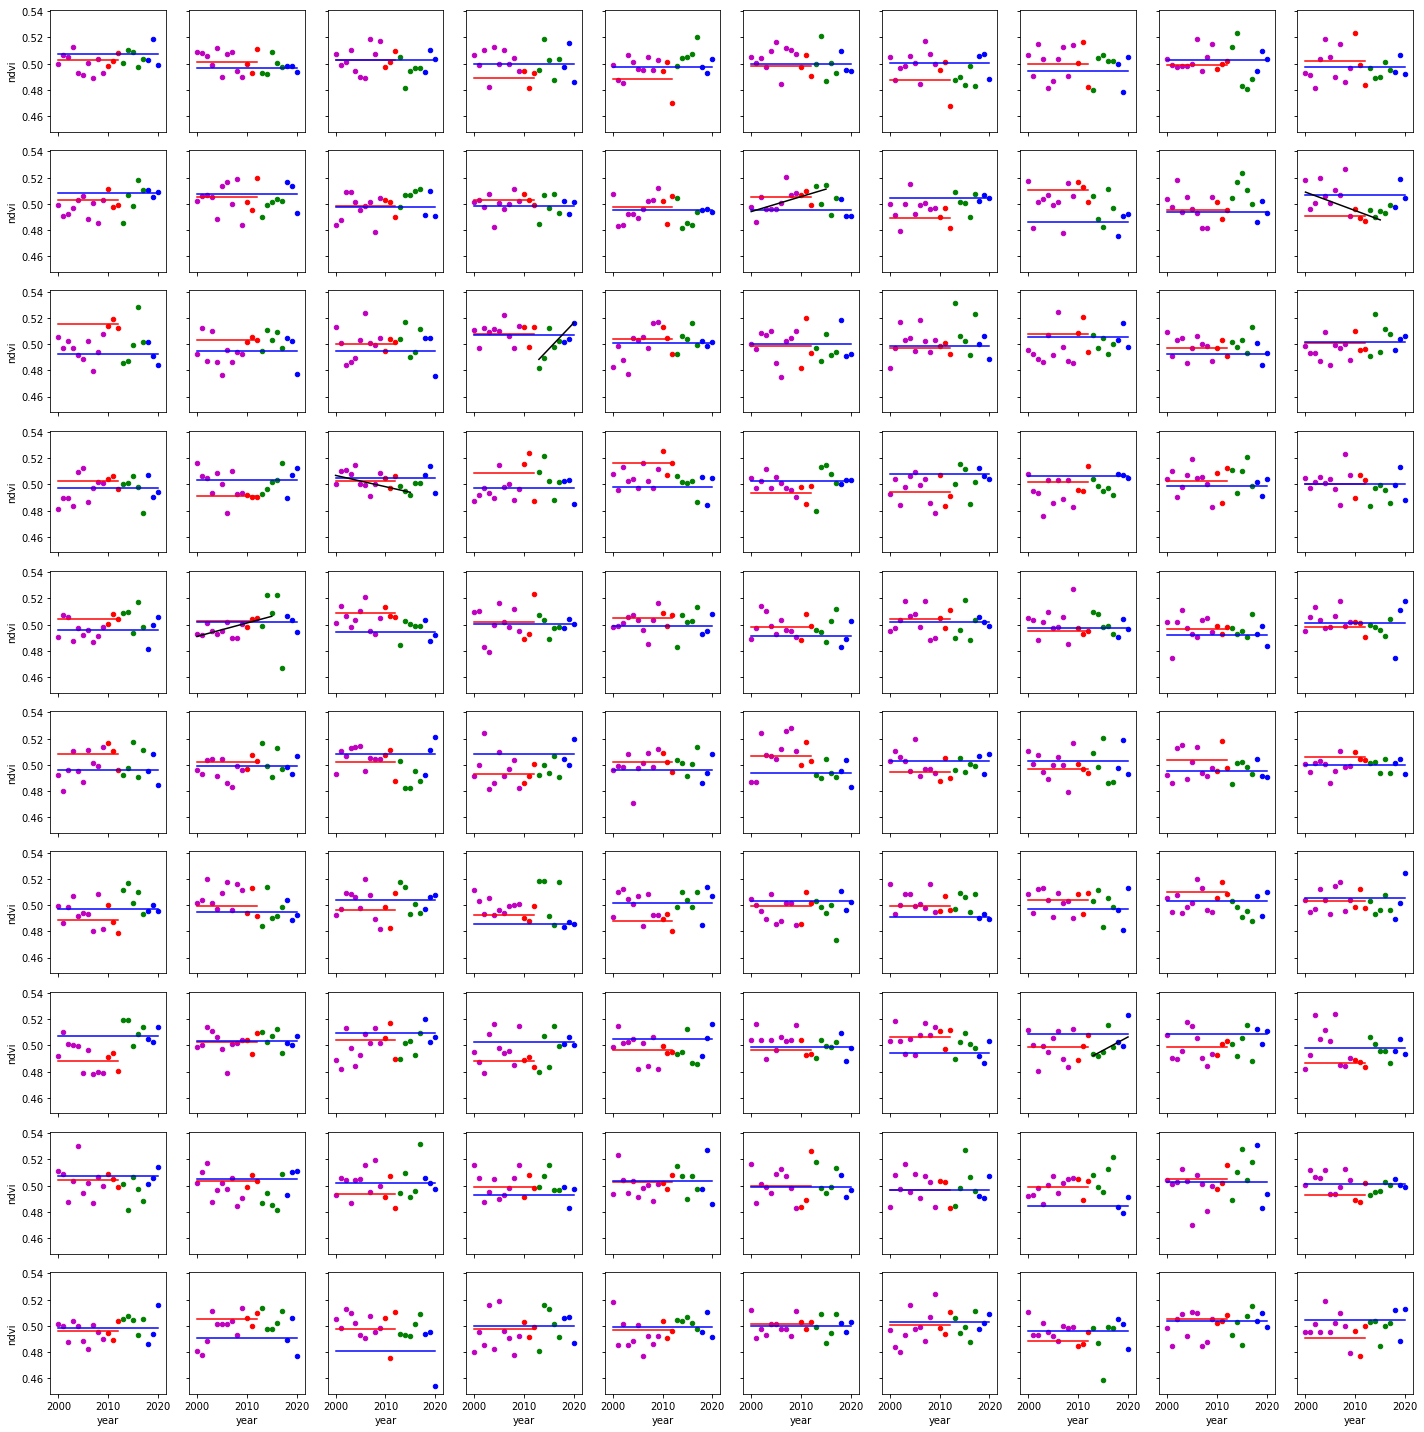

100 simulations run
42  simulations had positive or negative change (abs value more than 20)
4  simulations had positive or negative trend in 2000-2014
2  simulations had positive or negative trend in 2003-2020


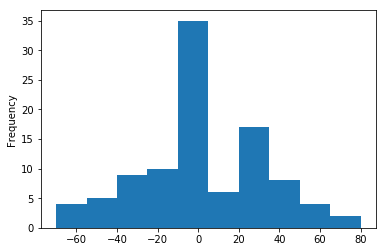

,origin,slope,rand_mu,rand_sigma,mean_10_12,mean_18_20,rank_10_12,rank_18_20,rank_diff,trend_2000_2014,trend_2013_2020
0,0,0,0.5,0.01,0.5027790867985886,0.507101751176292,60.0,90.0,30.0,no trend,no trend
0,0,0,0.5,0.01,0.5013009174303019,0.49658897363121485,40.0,30.0,-10.0,no trend,no trend
0,0,0,0.5,0.01,0.5025224737053461,0.5025171783543522,50.0,50.0,0.0,no trend,no trend
0,0,0,0.5,0.01,0.4894050879176077,0.4996281295816292,10.0,30.0,20.0,no trend,no trend
0,0,0,0.5,0.01,0.48856450794071876,0.49785640361139416,20.0,50.0,30.0,no trend,no trend
0,0,0,0.5,0.01,0.49831447242194987,0.49981572966000537,20.0,20.0,0.0,no trend,no trend
0,0,0,0.5,0.01,0.487959844437599,0.5004010560737878,20.0,60.0,40.0,no trend,no trend
0,0,0,0.5,0.01,0.49949394472114833,0.49443120682643915,40.0,40.0,0.0,no trend,no trend
0,0,0,0.5,0.01,0.49931967302599195,0.5026023175677239,50.0,60.0,10.0,no trend,no trend
0,0,0,0.5,0.01,0.501968343673332,0.49762355461077545,60.0,60.0,0.0,no trend,no trend


In [129]:
results = pd.DataFrame()

origin = 0 
slope = 0
rand_mu = 0.5
rand_sigma=0.01

# set to 0 if no plots wanted (don't plot if more than 100 simulations)
plot = 1
simulations = 100

if plot:
    fig, ax = plt.subplots(10,10,sharex=True, sharey=True, figsize=(20 ,20), tight_layout=True)
ax_x = 0
ax_y = 0

for i in range(simulations):
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2021)
    df.index= pd.date_range(start='2000', end='2021', freq='1Y')
    df['ndvi'] = origin + slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  

    #print('ndvi 2000-2009 sorted', df.loc['2000':'2009', 'ndvi'].sort_values())

    mean_10_12 = df.loc['2010':'2012', 'ndvi'].mean()
    rank_10_12 = stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_10_12)
    mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
    rank_18_20 = stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_18_20)
    rank_diff = rank_18_20 - rank_10_12
    trend_2000_2014, h, p, z, Tau, s, var_s, slope_2000_2014, intercept_2000_2014 = mk.original_test(df.loc['2000':'2015', 'ndvi'])
    trend_2013_2020, h, p, z, Tau, s, var_s, slope_2013_2020, intercept_2013_2020 = mk.original_test(df.loc['2013':'2020', 'ndvi'])


    df_result = pd.DataFrame(np.array([[origin,slope,rand_mu,rand_sigma,mean_10_12,mean_18_20,rank_10_12,rank_18_20,rank_diff,trend_2000_2014,trend_2013_2020]]), 
                      columns=['origin','slope','rand_mu','rand_sigma','mean_10_12','mean_18_20','rank_10_12','rank_18_20','rank_diff','trend_2000_2014','trend_2013_2020'])
    results=results.append(df_result)
    
    if plot:
        df.loc['2000':'2009'].plot.scatter(x='year', y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        df.loc['2013':'2017'].plot.scatter(x='year', y='ndvi', marker='o', color='g', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
        df.loc['2010':'2012'].plot.scatter(x='year', y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        df.loc['2018':'2020'].plot.scatter(x='year', y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
        #ax[ax_x,ax_y].set_xlim(['1999','2021'])
        #ax[ax_x,ax_y].set_ylim([0,1])
        ax[ax_x,ax_y].plot([2000,2012],[mean_10_12,mean_10_12], color= 'r')
        ax[ax_x,ax_y].plot([2000,2020],[mean_18_20,mean_18_20], color= 'b')
        #df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
         

        if trend_2000_2014 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2000':'2015', 'year'], intercept_2000_2014 + (df.loc['2000':'2015', 'year'] - 2000) * slope_2000_2014, color='k') 
        if trend_2013_2020 != 'no trend':
            ax[ax_x,ax_y].plot(df.loc['2013':'2020', 'year'], intercept_2013_2020 + (df.loc['2013':'2020', 'year'] - 2013) * slope_2013_2020, color='k') 
                
        if ax_y == 9:
            ax_y=0
            ax_x=ax_x+1
        else:
            ax_y=ax_y+1        
    
if plot:
    plt.show()

print(simulations, 'simulations run')
print(results.loc[results['rank_diff'].astype(float).abs() > 20, 'rank_diff'].count(), ' simulations had positive or negative change (abs value more than 20)')
print(results.loc[results['trend_2000_2014'] != 'no trend', 'origin'].count(), ' simulations had positive or negative trend in 2000-2014')
print(results.loc[results['trend_2013_2020'] != 'no trend', 'origin'].count(), ' simulations had positive or negative trend in 2003-2020')
results['rank_diff'].astype(float).plot.hist()
plt.show()

results